In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [3]:
from google.colab import files
files.upload()  # Then choose kaggle.json from your computer


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rania121","key":"214a81c41cafd2a04cf2b029606405a5"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [01:08<00:00, 32.7MB/s]
100% 2.29G/2.29G [01:08<00:00, 35.7MB/s]


In [6]:
!unzip chest-xray-pneumonia.zip -d chest_xray

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/chest_xray/train

In [7]:
!ls chest_xray


chest_xray


In [8]:
import os
print(os.listdir())


['.config', 'chest_xray', 'chest-xray-pneumonia.zip', 'kaggle.json', 'sample_data']


In [9]:
os.listdir("chest_xray")


['chest_xray']

In [10]:
base_path = "chest_xray/chest_xray"

for folder in ["train", "val", "test"]:
    for cls in os.listdir(os.path.join(base_path, folder)):
        folder_path = os.path.join(base_path, folder, cls)
        num_images = len(os.listdir(folder_path))
        print(f"{folder}/{cls}: {num_images} images")


train/PNEUMONIA: 3875 images
train/NORMAL: 1341 images
val/PNEUMONIA: 8 images
val/NORMAL: 8 images
test/PNEUMONIA: 390 images
test/NORMAL: 234 images


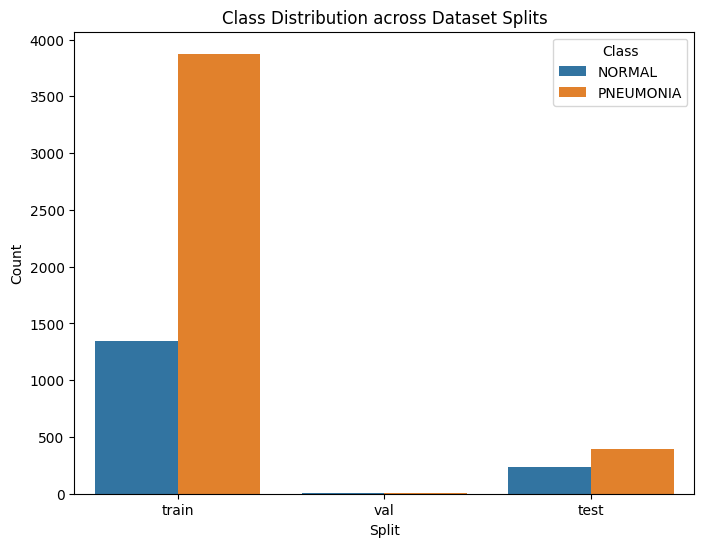

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = []

for split in ["train", "val", "test"]:
    for cls in ["NORMAL", "PNEUMONIA"]:
        count = len(os.listdir(os.path.join(base_path, split, cls)))
        data.append([split, cls, count])

df = pd.DataFrame(data, columns=["Split", "Class", "Count"])

plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Split", y="Count", hue="Class")
plt.title("Class Distribution across Dataset Splits")
plt.show()


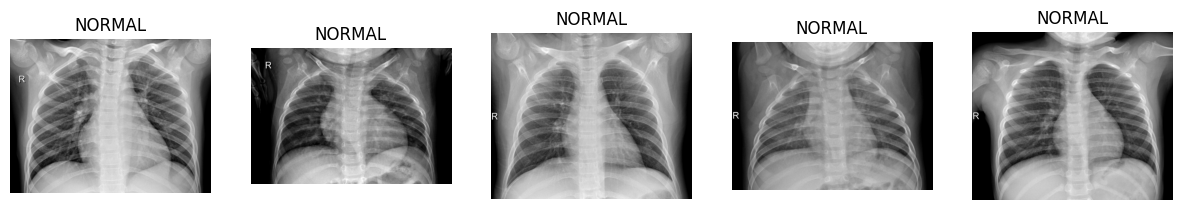

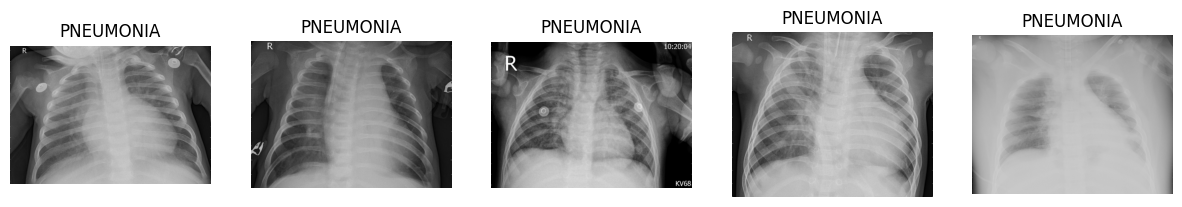

In [13]:
import matplotlib.image as mpimg
import random

def show_random_images(folder_path, class_name, num_images=5):
    class_path = os.path.join(folder_path, class_name)
    images = random.sample(os.listdir(class_path), num_images)

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(class_name)
        plt.axis('off')
    plt.show()

train_path = os.path.join(base_path, "train")
show_random_images(train_path, "NORMAL")
show_random_images(train_path, "PNEUMONIA")


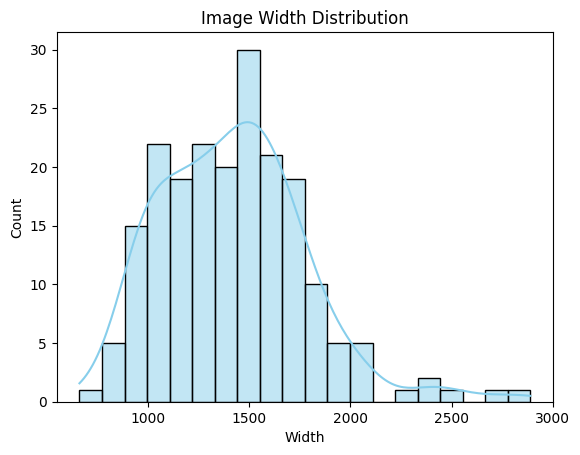

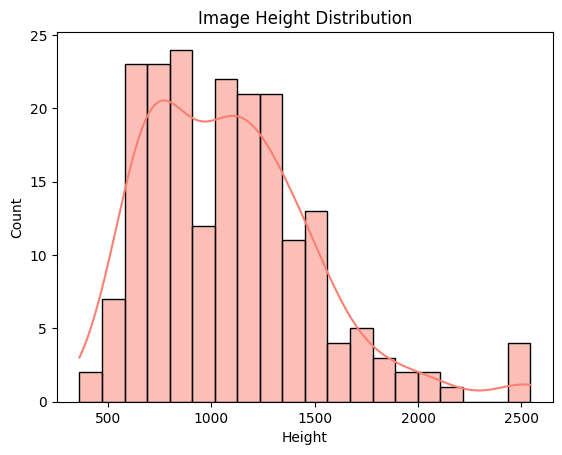

In [14]:
from PIL import Image
import numpy as np

img_shapes = []

for cls in ["NORMAL", "PNEUMONIA"]:
    path = os.path.join(base_path, "train", cls)
    for img_name in random.sample(os.listdir(path), 100):
        img = Image.open(os.path.join(path, img_name))
        img_shapes.append(img.size)

sizes = pd.DataFrame(img_shapes, columns=["Width", "Height"])
sns.histplot(sizes["Width"], bins=20, kde=True, color='skyblue')
plt.title("Image Width Distribution")
plt.show()

sns.histplot(sizes["Height"], bins=20, kde=True, color='salmon')
plt.title("Image Height Distribution")
plt.show()


In [15]:
import os
import matplotlib.image as mpimg

folder_path = os.path.join(base_path, folder, cls)
types_set = set()

for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)
    img = mpimg.imread(img_path)
    types_set.add((img.dtype, img.shape))

print(f"Unique types found: {types_set}")


Unique types found: {(dtype('uint8'), (792, 1352)), (dtype('uint8'), (808, 1256)), (dtype('uint8'), (880, 1096)), (dtype('uint8'), (666, 1130)), (dtype('uint8'), (1136, 1400)), (dtype('uint8'), (792, 1232)), (dtype('uint8'), (1008, 1392)), (dtype('uint8'), (760, 1032)), (dtype('uint8'), (744, 1264)), (dtype('uint8'), (696, 1160)), (dtype('uint8'), (984, 1328)), (dtype('uint8'), (784, 1088)), (dtype('uint8'), (528, 936)), (dtype('uint8'), (752, 1136)), (dtype('uint8'), (608, 976)), (dtype('uint8'), (664, 952)), (dtype('uint8'), (536, 944)), (dtype('uint8'), (740, 1006)), (dtype('uint8'), (680, 1120)), (dtype('uint8'), (776, 1080)), (dtype('uint8'), (560, 864)), (dtype('uint8'), (960, 1160)), (dtype('uint8'), (832, 1152)), (dtype('uint8'), (1024, 1432)), (dtype('uint8'), (568, 1024)), (dtype('uint8'), (856, 1192)), (dtype('uint8'), (776, 1168)), (dtype('uint8'), (654, 1136)), (dtype('uint8'), (656, 952)), (dtype('uint8'), (528, 944)), (dtype('uint8'), (643, 1022)), (dtype('uint8'), (680,

In [23]:
import cv2
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

base_path = "chest_xray/chest_xray/train"

images = []
labels = []

for label in tqdm(os.listdir(base_path)):
    folder_path = os.path.join(base_path, label)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.endswith(".jpeg") or img_file.endswith(".jpg") or img_file.endswith(".png"):
                img_path = os.path.join(folder_path, img_file)

                img = cv2.imread(img_path)

                img = cv2.resize(img, (128, 128)) / 255.0

                images.append(img)
                labels.append(label)


100%|██████████| 2/2 [00:43<00:00, 21.65s/it]


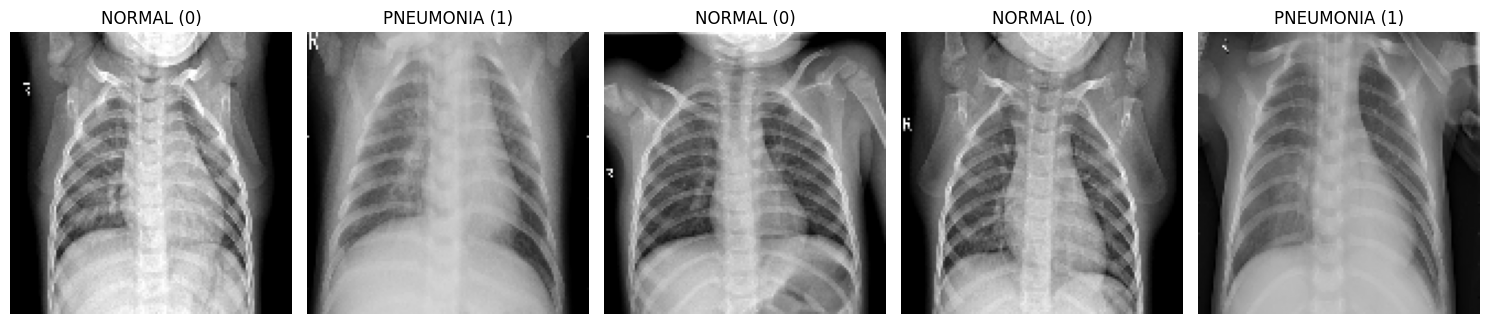

In [18]:
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

import random

num_images = 5

plt.figure(figsize=(15, 5))

for i in range(num_images):
    idx = random.randint(0, len(images) - 1)
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[idx])
    plt.title(f"{labels[idx]} ({encoded_labels[idx]})")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [20]:
train_dir = "chest_xray/chest_xray/train"

all_stats = []

for label_folder in tqdm(os.listdir(train_dir)):
    label_path = os.path.join(train_dir, label_folder)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            if img_file.lower().endswith(('.jpg', '.jpeg')):
                image_path = os.path.join(label_path, img_file)
                image = cv2.imread(image_path)
                if image is not None:
                    img_shape = image.shape
                    min_pixel = image.min()
                    max_pixel = image.max()
                    mean_pixel = image.mean()
                    all_stats.append((img_file, img_shape, min_pixel, max_pixel, mean_pixel))

for info in all_stats[:5]:
    print(f"Image: {info[0]}")
    print(f"  Shape: {info[1]}")
    print(f"  Min pixel: {info[2]}")
    print(f"  Max pixel: {info[3]}")
    print(f"  Mean pixel value: {info[4]:.2f}")
    print("-" * 30)


100%|██████████| 2/2 [00:57<00:00, 28.67s/it]

Image: person557_virus_1097.jpeg
  Shape: (968, 1376, 3)
  Min pixel: 0
  Max pixel: 255
  Mean pixel value: 129.14
------------------------------
Image: person1478_bacteria_3848.jpeg
  Shape: (329, 647, 3)
  Min pixel: 0
  Max pixel: 214
  Mean pixel value: 144.70
------------------------------
Image: person333_virus_688.jpeg
  Shape: (1024, 1424, 3)
  Min pixel: 0
  Max pixel: 255
  Mean pixel value: 122.97
------------------------------
Image: person921_virus_1578.jpeg
  Shape: (458, 732, 3)
  Min pixel: 5
  Max pixel: 221
  Mean pixel value: 153.13
------------------------------
Image: person464_virus_954.jpeg
  Shape: (519, 819, 3)
  Min pixel: 0
  Max pixel: 217
  Mean pixel value: 143.00
------------------------------


In [25]:
from PIL import Image
import os
import numpy as np
from tqdm import tqdm

train_dir = "chest_xray/chest_xray/train"
image_size = (128, 128)

X = []
y = []
classes = sorted(os.listdir(train_dir))
print("Classes found:", classes)

label_to_index = {label: idx for idx, label in enumerate(classes)}

for label in classes:
    folder = os.path.join(train_dir, label)
    for filename in tqdm(os.listdir(folder), desc=f"Loading {label}"):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, filename)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize(image_size)
                img_array = np.array(img)
                X.append(img_array)
                y.append(label_to_index[label])
            except Exception as e:
                print(f"Failed to load {img_path}: {e}")

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", classes)


Classes found: ['NORMAL', 'PNEUMONIA']


Loading PNEUMONIA: 100%|██████████| 3875/3875 [00:54<00:00, 70.80it/s]


X shape: (5216, 128, 128, 3)
y shape: (5216,)
Classes: ['NORMAL', 'PNEUMONIA']
